# Telecom Churn Case Study Hackathon

### Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

### Goal

To build predictive models to identify customers at high risk of churn so that the company can take action steps such as providing special plans, discounts on recharge etc.
To identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.
To recommend strategies to manage customer churn based on your observations.

### Steps
- Reading and understanding of dataset
- Missing value treatment 
- Feature Engineering 
- Visualising the data - univariate, bivariate analysis
- Outlier treatment
- Data preparation for Modeling
- Building Different Models (Logistic regression with PCA,Random Forest,XG Boost )
- Feature selection
- Final Model Building  
- Creation of Kaggle submission file 
- Summary /  Business Insights

### Reading and understanding of dataset

In [1011]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [1012]:
# reading train data
churn = pd.read_csv("train.csv")

In [1013]:
# reading test data
churn_test = pd.read_csv("test.csv")

In [1014]:
# let's look at the train data
churn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [1015]:
# Let's look at the data type and count of each attribute of train data set
churn.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

There are 69999 rows and 172 columns in train set. Lot of the columns are numeric type, but there are only three columns which are categorical. There are missing values also.

In [1016]:
# Let's look at the data type and count of each attribute of test data set
churn_test.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        30000 non-null  int64  
 1    circle_id                 30000 non-null  int64  
 2    loc_og_t2o_mou            29684 non-null  float64
 3    std_og_t2o_mou            29684 non-null  float64
 4    loc_ic_t2o_mou            29684 non-null  float64
 5    last_date_of_month_6      30000 non-null  object 
 6    last_date_of_month_7      29798 non-null  object 
 7    last_date_of_month_8      29633 non-null  object 
 8    arpu_6                    30000 non-null  float64
 9    arpu_7                    30000 non-null  float64
 10   arpu_8                    30000 non-null  float64
 11   onnet_mou_6               28831 non-null  float64
 12   onnet_mou_7               28828 non-null  float64
 13   onnet_mou_8               28325 non-null  fl

There are 30000 rows and 171 columns in test set. Lot of the columns are numeric type, but there are only three columns which are categorical. There are missing values also.<BR>
There is ony attribute less in test set compared to train set. This is because "churn_probability" is not present in test as this needs to be predicted and this is the ultimate goal

In [1017]:
# Let's look at train data statistics
churn.describe(include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,68898,68765,67538,69999.000000,69999.000000

In [1018]:
# create backup of train data
original = churn.copy()

### Missing value treatment 

In [1019]:
# create column name list by types of columns
id_cols = ['circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

#ID cols: 1
#Date cols:9
#Numeric cols:156
#Category cols:6
True


In [1020]:
# Let's look at missing value ratio in each column
churn.isnull().sum()*100/churn.shape[0]

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [1021]:
# some recharge columns have minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8','count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

churn[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


In [1022]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
churn.loc[churn.total_rech_data_6.isnull() & churn.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN
12,NaN,NaN


In [1023]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', ]

In [1024]:
# Train data - impute missing values with 0 as minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.
churn[zero_impute] = churn[zero_impute].apply(lambda x: x.fillna(0))

In [1025]:
# We will have to do same missing value treatment for test data also like train data so that model works
# Test data - impute missing values with 0 as minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.
churn[zero_impute] = churn[zero_impute].apply(lambda x: x.fillna(0))
churn_test[zero_impute] = churn_test[zero_impute].apply(lambda x: x.fillna(0))

In [1027]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(churn[zero_impute].isnull().sum()*100/churn.shape[1])

# summary
print("\n\nSummary statistics\n")
print(churn[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       69999.000000       69999.000000       69999.000000   
mean            0.619309           0.683981           0.697867   
std             1.762010           1.943193           1.973434   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        69999.000000        69999.0000

In [1028]:
# Train data - drop id and date columns as those does not have much importance
print("Shape before dropping: ", churn.shape)
churn = churn.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn.shape)

Shape before dropping:  (69999, 172)
Shape after dropping:  (69999, 162)


In [1029]:
# We will have to do same missing value treatment for test data also like train data so that model works
# drop id and date columns
print("Shape before dropping: ", churn_test.shape)
churn_test = churn_test.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn_test.shape)

Shape before dropping:  (30000, 171)
Shape after dropping:  (30000, 161)


In [1030]:
# Train data - replace missing values with '-1' in categorical columns
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))

In [1031]:
# We will have to do same missing value treatment for test data also like train data so that model works
# Test data - replace missing values with '-1' in categorical columns
churn_test[cat_cols] = churn_test[cat_cols].apply(lambda x: x.fillna(-1))


In [1032]:
# missing value ratio
print("Missing value ratio:\n")
print(churn[cat_cols].isnull().sum()*100/churn.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


#### Let's will drop columns of train and test data set having missing value count more than 70%

In [1033]:
initial_cols = churn.shape[1]
MISSING_THRESHOLD = 0.7
include_cols = list(churn.apply(lambda column: True if column.isnull().sum()/churn.shape[0] < MISSING_THRESHOLD else False))
drop_missing = pd.DataFrame({'features':churn.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,id,True
1,loc_og_t2o_mou,True
2,std_og_t2o_mou,True
3,loc_ic_t2o_mou,True
4,arpu_6,True
5,arpu_7,True
6,arpu_8,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [1034]:
## Some common functions which will be used in the notebook multiple times

# It will print some data statistics
def  data_statistics (df) :
    return pd.DataFrame({
                'Datatype' : df.dtypes.astype(str), 
                'Non_Null_Count': df.count(axis = 0).astype(int), 
                'Null_Count': df.isnull().sum().astype(int), 
                'Null_Percentage': round(df.isnull().sum()/len(df) * 100 , 2), 
                'Unique_Values_Count': df.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

# It will print the list of columns having same data 
def check_cols_same_value (df):
    col_having_same_value = []
    for i in df.columns:
        if df[i].nunique() == 1:
            col_having_same_value.append(i)
    return col_having_same_value

In [1035]:
# Train data - data statistics 
data_statistics(churn)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.90,5506
arpu_2g_6,float64,17568,52431,74.90,5389
count_rech_2g_6,float64,17568,52431,74.90,30
count_rech_3g_6,float64,17568,52431,74.90,23
arpu_2g_7,float64,17865,52134,74.48,5056
count_rech_2g_7,float64,17865,52134,74.48,33
arpu_3g_7,float64,17865,52134,74.48,5389
count_rech_3g_7,float64,17865,52134,74.48,27
count_rech_2g_8,float64,18417,51582,73.69,33
arpu_3g_8,float64,18417,51582,73.69,5816


In [1036]:
# Train data - Let's separate out columns having missing value greater than 70%
data = data_statistics(churn)
condition = data['Null_Percentage'] > 70
missing_values = data[condition]
print("No of columns having high missing values:",len(missing_values.index))
missing_values

No of columns having high missing values: 12


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.90,5506
arpu_2g_6,float64,17568,52431,74.90,5389
count_rech_2g_6,float64,17568,52431,74.90,30
count_rech_3g_6,float64,17568,52431,74.90,23
arpu_2g_7,float64,17865,52134,74.48,5056
count_rech_2g_7,float64,17865,52134,74.48,33
arpu_3g_7,float64,17865,52134,74.48,5389
count_rech_3g_7,float64,17865,52134,74.48,27
count_rech_2g_8,float64,18417,51582,73.69,33
arpu_3g_8,float64,18417,51582,73.69,5816


In [1037]:
# Train data - Let's drop the columns ahving 70% missing value 
churn.drop(missing_values.index,axis=1,inplace=True)

In [1038]:
# train data dimension after dropping 12 columns 
churn.shape

(69999, 150)

In [1039]:
#Test data - dimension  before dropping same columns having 70% missing value like train data set
churn_test.shape

(30000, 161)

In [1040]:
# Test data - Let's drop the columns ahving 70% missing value 
churn_test.drop(missing_values.index,axis=1,inplace=True)

In [1041]:
#Test data - dimension after dropping same columns having 70% missing value like train data set
churn_test.shape

(30000, 149)

In [1042]:
# Train data - find out columns having same value (no variation)
cols_same_value = check_cols_same_value(churn)
cols_same_value

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [1043]:
# Train data - Let's drop columns having no variation
print("diemnsion before drop:",churn.shape)
churn.drop(cols_same_value,axis=1,inplace=True)
print("diemnsion before drop:",churn.shape)

diemnsion before drop: (69999, 150)
diemnsion before drop: (69999, 141)


In [1044]:
# Test data - Let's drop columns having no variation , same columns which have been dropped from train data
print("diemnsion before drop:",churn_test.shape)
churn_test.drop(cols_same_value,axis=1,inplace=True)
print("diemnsion before drop:",churn_test.shape)

diemnsion before drop: (30000, 149)
diemnsion before drop: (30000, 140)


In [1045]:
# Train data - check for remaining missing value
data_statistics(churn)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_mou_8,float64,66296,3703,5.29,24182
std_ic_t2t_mou_8,float64,66296,3703,5.29,5367
isd_og_mou_8,float64,66296,3703,5.29,1008
std_og_t2m_mou_8,float64,66296,3703,5.29,15968
spl_og_mou_8,float64,66296,3703,5.29,3848
std_og_t2t_mou_8,float64,66296,3703,5.29,14483
og_others_8,float64,66296,3703,5.29,179
loc_og_mou_8,float64,66296,3703,5.29,21950
loc_ic_t2t_mou_8,float64,66296,3703,5.29,11446
loc_og_t2c_mou_8,float64,66296,3703,5.29,2204


#### Impute misisng values using "IterativeImputer"

In [1046]:
# Install required package and load
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE


In [1048]:
# Train data - Imput missing data
churn_imputed = MICE(max_iter=1).fit_transform(churn)


In [1049]:
# Train data - convert imputed numpy array to pandas dataframe
churn = pd.DataFrame(churn_imputed, columns=churn_cols)
print(churn.isnull().sum()*100/churn.shape[0])

id                    0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_m

In [1050]:
#Test data - impute missing data
churn_test_imputed = MICE(max_iter=1).fit_transform(churn_test)


In [1052]:
# Test data - convert imputed numpy array to pandas dataframe
churn_test = pd.DataFrame(churn_test_imputed, columns=churn_test_cols)
print(churn_test.isnull().sum()*100/churn_test.shape[0])

id                    0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_m

### Feature engineering 

In [1053]:
# Train data - calculating the total data recharge amount for June and July --> number of recharges * average recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

In [1054]:
# Test data - calculating the total data recharge amount for June and July --> number of recharges * average recharge amount
churn_test['total_data_rech_6'] = churn_test.total_rech_data_6 * churn_test.av_rech_amt_data_6
churn_test['total_data_rech_7'] = churn_test.total_rech_data_7 * churn_test.av_rech_amt_data_7

In [1055]:
# Train data - calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

In [1056]:
# Train data - calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn_test['amt_data_6'] = churn_test.total_rech_amt_6 + churn_test.total_data_rech_6
churn_test['amt_data_7'] = churn_test.total_rech_amt_7 + churn_test.total_data_rech_7

In [1057]:
# Train data - calculate average recharge done by customer in June and July
churn['av_amt_data_6_7'] = (churn["amt_data_6"] + churn["amt_data_7"])/2

In [1058]:
# Test data - calculate average recharge done by customer in June and July
churn_test['av_amt_data_6_7'] = (churn_test["amt_data_6"] + churn_test["amt_data_7"])/2

In [1059]:
# Train data - look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [1060]:
# Train data - retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(21013, 146)

In [1061]:
# Train data - delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churn_filtered.shape

(21013, 141)

We're left with 21013 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

In [1062]:
# Test data - delete variables created to filter high-value customers
churn_test = churn_test.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churn_test.shape

(30000, 140)

In [1063]:
# Train data - calculate churn ratio
print("Churn Ratio:")
print(churn_filtered["churn_probability"].value_counts()*100/churn_filtered.shape[0])

Churn Ratio:
0.0    91.724171
1.0     8.275829
Name: churn_probability, dtype: float64


In [1064]:
# Train data - Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.
churn_filtered['arpu_diff'] = churn_filtered.arpu_8 - ((churn_filtered.arpu_6 + churn_filtered.arpu_7)/2)
churn_filtered['onnet_mou_diff'] = churn_filtered.onnet_mou_8 - ((churn_filtered.onnet_mou_6 + churn_filtered.onnet_mou_7)/2)
churn_filtered['offnet_mou_diff'] = churn_filtered.offnet_mou_8 - ((churn_filtered.offnet_mou_6 + churn_filtered.offnet_mou_7)/2)
churn_filtered['roam_ic_mou_diff'] = churn_filtered.roam_ic_mou_8 - ((churn_filtered.roam_ic_mou_6 + churn_filtered.roam_ic_mou_7)/2)
churn_filtered['roam_og_mou_diff'] = churn_filtered.roam_og_mou_8 - ((churn_filtered.roam_og_mou_6 + churn_filtered.roam_og_mou_7)/2)
churn_filtered['loc_og_mou_diff'] = churn_filtered.loc_og_mou_8 - ((churn_filtered.loc_og_mou_6 + churn_filtered.loc_og_mou_7)/2)
churn_filtered['std_og_mou_diff'] = churn_filtered.std_og_mou_8 - ((churn_filtered.std_og_mou_6 + churn_filtered.std_og_mou_7)/2)
churn_filtered['isd_og_mou_diff'] = churn_filtered.isd_og_mou_8 - ((churn_filtered.isd_og_mou_6 + churn_filtered.isd_og_mou_7)/2)
churn_filtered['spl_og_mou_diff'] = churn_filtered.spl_og_mou_8 - ((churn_filtered.spl_og_mou_6 + churn_filtered.spl_og_mou_7)/2)
churn_filtered['total_og_mou_diff'] = churn_filtered.total_og_mou_8 - ((churn_filtered.total_og_mou_6 + churn_filtered.total_og_mou_7)/2)
churn_filtered['loc_ic_mou_diff'] = churn_filtered.loc_ic_mou_8 - ((churn_filtered.loc_ic_mou_6 + churn_filtered.loc_ic_mou_7)/2)
churn_filtered['std_ic_mou_diff'] = churn_filtered.std_ic_mou_8 - ((churn_filtered.std_ic_mou_6 + churn_filtered.std_ic_mou_7)/2)
churn_filtered['isd_ic_mou_diff'] = churn_filtered.isd_ic_mou_8 - ((churn_filtered.isd_ic_mou_6 + churn_filtered.isd_ic_mou_7)/2)
churn_filtered['spl_ic_mou_diff'] = churn_filtered.spl_ic_mou_8 - ((churn_filtered.spl_ic_mou_6 + churn_filtered.spl_ic_mou_7)/2)
churn_filtered['total_ic_mou_diff'] = churn_filtered.total_ic_mou_8 - ((churn_filtered.total_ic_mou_6 + churn_filtered.total_ic_mou_7)/2)
churn_filtered['total_rech_num_diff'] = churn_filtered.total_rech_num_8 - ((churn_filtered.total_rech_num_6 + churn_filtered.total_rech_num_7)/2)
churn_filtered['total_rech_amt_diff'] = churn_filtered.total_rech_amt_8 - ((churn_filtered.total_rech_amt_6 + churn_filtered.total_rech_amt_7)/2)
churn_filtered['max_rech_amt_diff'] = churn_filtered.max_rech_amt_8 - ((churn_filtered.max_rech_amt_6 + churn_filtered.max_rech_amt_7)/2)
churn_filtered['total_rech_data_diff'] = churn_filtered.total_rech_data_8 - ((churn_filtered.total_rech_data_6 + churn_filtered.total_rech_data_7)/2)
churn_filtered['max_rech_data_diff'] = churn_filtered.max_rech_data_8 - ((churn_filtered.max_rech_data_6 + churn_filtered.max_rech_data_7)/2)
churn_filtered['av_rech_amt_data_diff'] = churn_filtered.av_rech_amt_data_8 - ((churn_filtered.av_rech_amt_data_6 + churn_filtered.av_rech_amt_data_7)/2)
churn_filtered['vol_2g_mb_diff'] = churn_filtered.vol_2g_mb_8 - ((churn_filtered.vol_2g_mb_6 + churn_filtered.vol_2g_mb_7)/2)
churn_filtered['vol_3g_mb_diff'] = churn_filtered.vol_3g_mb_8 - ((churn_filtered.vol_3g_mb_6 + churn_filtered.vol_3g_mb_7)/2)

In [1065]:
# Test data - Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.
churn_test['arpu_diff'] = churn_test.arpu_8 - ((churn_test.arpu_6 + churn_test.arpu_7)/2)
churn_test['onnet_mou_diff'] = churn_test.onnet_mou_8 - ((churn_test.onnet_mou_6 + churn_test.onnet_mou_7)/2)
churn_test['offnet_mou_diff'] = churn_test.offnet_mou_8 - ((churn_test.offnet_mou_6 + churn_test.offnet_mou_7)/2)
churn_test['roam_ic_mou_diff'] = churn_test.roam_ic_mou_8 - ((churn_test.roam_ic_mou_6 + churn_test.roam_ic_mou_7)/2)
churn_test['roam_og_mou_diff'] = churn_test.roam_og_mou_8 - ((churn_test.roam_og_mou_6 + churn_test.roam_og_mou_7)/2)
churn_test['loc_og_mou_diff'] = churn_test.loc_og_mou_8 - ((churn_test.loc_og_mou_6 + churn_test.loc_og_mou_7)/2)
churn_test['std_og_mou_diff'] = churn_test.std_og_mou_8 - ((churn_test.std_og_mou_6 + churn_test.std_og_mou_7)/2)
churn_test['isd_og_mou_diff'] = churn_test.isd_og_mou_8 - ((churn_test.isd_og_mou_6 + churn_test.isd_og_mou_7)/2)
churn_test['spl_og_mou_diff'] = churn_test.spl_og_mou_8 - ((churn_test.spl_og_mou_6 + churn_test.spl_og_mou_7)/2)
churn_test['total_og_mou_diff'] = churn_test.total_og_mou_8 - ((churn_test.total_og_mou_6 + churn_test.total_og_mou_7)/2)
churn_test['loc_ic_mou_diff'] = churn_test.loc_ic_mou_8 - ((churn_test.loc_ic_mou_6 + churn_test.loc_ic_mou_7)/2)
churn_test['std_ic_mou_diff'] = churn_test.std_ic_mou_8 - ((churn_test.std_ic_mou_6 + churn_test.std_ic_mou_7)/2)
churn_test['isd_ic_mou_diff'] = churn_test.isd_ic_mou_8 - ((churn_test.isd_ic_mou_6 + churn_test.isd_ic_mou_7)/2)
churn_test['spl_ic_mou_diff'] = churn_test.spl_ic_mou_8 - ((churn_test.spl_ic_mou_6 + churn_test.spl_ic_mou_7)/2)
churn_test['total_ic_mou_diff'] = churn_test.total_ic_mou_8 - ((churn_test.total_ic_mou_6 + churn_test.total_ic_mou_7)/2)
churn_test['total_rech_num_diff'] = churn_test.total_rech_num_8 - ((churn_test.total_rech_num_6 + churn_test.total_rech_num_7)/2)
churn_test['total_rech_amt_diff'] = churn_test.total_rech_amt_8 - ((churn_test.total_rech_amt_6 + churn_test.total_rech_amt_7)/2)
churn_test['max_rech_amt_diff'] = churn_test.max_rech_amt_8 - ((churn_test.max_rech_amt_6 + churn_test.max_rech_amt_7)/2)
churn_test['total_rech_data_diff'] = churn_test.total_rech_data_8 - ((churn_test.total_rech_data_6 + churn_test.total_rech_data_7)/2)
churn_test['max_rech_data_diff'] = churn_test.max_rech_data_8 - ((churn_test.max_rech_data_6 + churn_test.max_rech_data_7)/2)
churn_test['av_rech_amt_data_diff'] = churn_test.av_rech_amt_data_8 - ((churn_test.av_rech_amt_data_6 + churn_test.av_rech_amt_data_7)/2)
churn_test['vol_2g_mb_diff'] = churn_test.vol_2g_mb_8 - ((churn_test.vol_2g_mb_6 + churn_test.vol_2g_mb_7)/2)
churn_test['vol_3g_mb_diff'] = churn_test.vol_3g_mb_8 - ((churn_test.vol_3g_mb_6 + churn_test.vol_3g_mb_7)/2)

In [1066]:
# Train data - let's look at summary of one of the difference variables
churn_filtered['total_og_mou_diff'].describe()

count    21013.000000
mean       -68.437759
std        502.233995
min      -7213.410000
25%       -169.295000
50%        -13.985000
75%         68.485000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

In [1067]:
# Train data - extract all names that end with 9
col_9_names = churn.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn_probability')
num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

In [1068]:
# Train data - change columns types
churn_filtered[num_cols] = churn_filtered[num_cols].apply(pd.to_numeric)
churn_filtered[cat_cols] = churn_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

### Visualising the data - univariate, bivariate and correlation analysis

#### Univariate Analysis

<Figure size 1600x2200 with 0 Axes>

<Axes: >

<Axes: xlabel='roam_ic_mou_8', ylabel='Density'>

<Axes: >

<Axes: xlabel='loc_og_mou_8', ylabel='Density'>

<Axes: >

<Axes: xlabel='total_rech_amt_8', ylabel='Density'>

<Axes: >

<Axes: xlabel='loc_ic_mou_8', ylabel='Density'>

<Axes: >

<Axes: xlabel='roam_og_mou_8', ylabel='Density'>

<Axes: >

<Axes: xlabel='arpu_diff', ylabel='Density'>

<Axes: >

<Axes: xlabel='loc_ic_t2m_mou_8', ylabel='Density'>

<Axes: >

<Axes: xlabel='last_day_rch_amt_8', ylabel='Density'>

<Axes: >

<Axes: xlabel='max_rech_amt_8', ylabel='Density'>

<Axes: >

<Axes: xlabel='total_rech_amt_diff', ylabel='Density'>

<Axes: >

<Axes: xlabel='total_ic_mou_diff', ylabel='Density'>

<Axes: >

<Axes: xlabel='roam_ic_mou_diff', ylabel='Density'>

<Axes: >

<Axes: xlabel='total_og_mou_diff', ylabel='Density'>

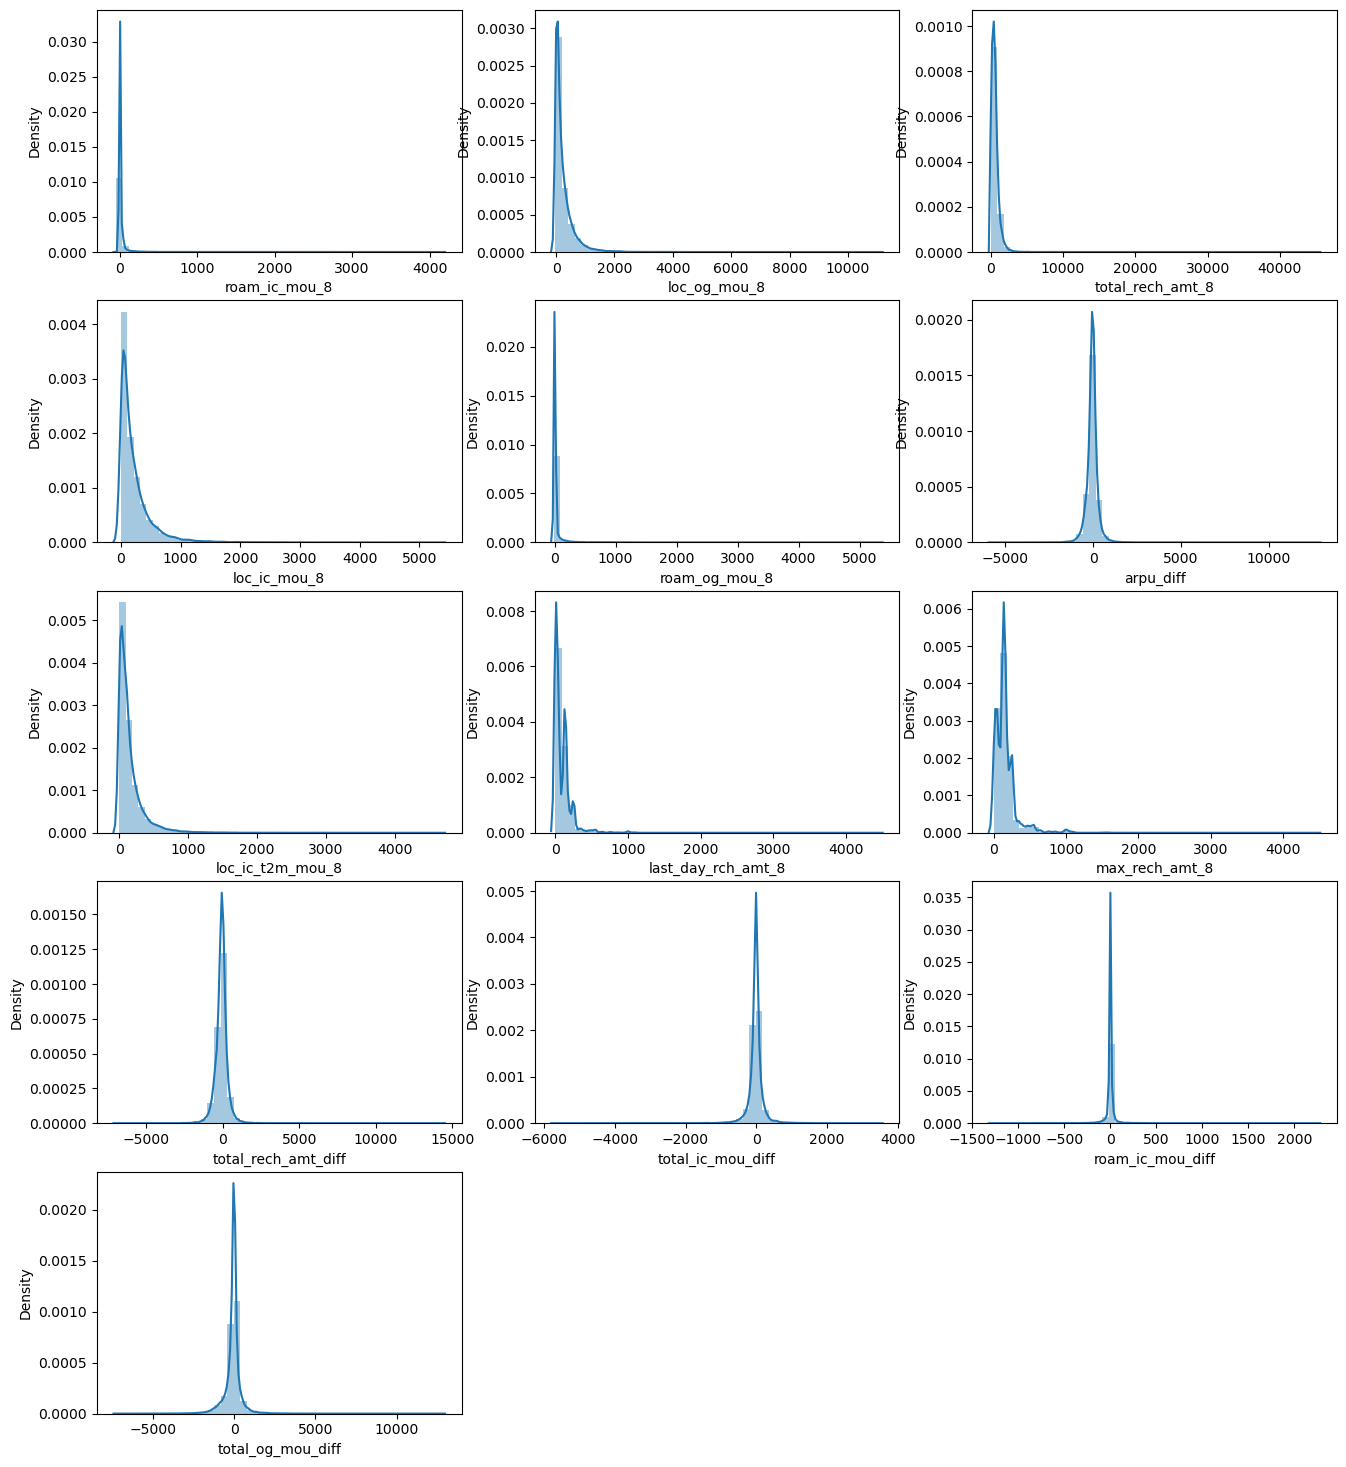

In [1069]:
# Let's plot some predictors w.r.t output variable churn_probability
plt.figure(figsize = (16, 22))
plt.subplot(6,3,1)
sns.distplot(churn_filtered['roam_ic_mou_8'])
plt.subplot(6,3,2)
sns.distplot(churn_filtered['loc_og_mou_8'])
plt.subplot(6,3,3)
sns.distplot(churn_filtered['total_rech_amt_8'])
plt.subplot(6,3,4)
sns.distplot(churn_filtered['loc_ic_mou_8'])
plt.subplot(6,3,5)
sns.distplot(churn_filtered['roam_og_mou_8'])
plt.subplot(6,3,6)
sns.distplot(churn_filtered['arpu_diff'])
plt.subplot(6,3,7)
sns.distplot(churn_filtered['loc_ic_t2m_mou_8'])
plt.subplot(6,3,8)
sns.distplot(churn_filtered['last_day_rch_amt_8'])
plt.subplot(6,3,9)
sns.distplot(churn_filtered['max_rech_amt_8'])
plt.subplot(6,3,10)
sns.distplot(churn_filtered['total_rech_amt_diff'])
plt.subplot(6,3,11)
sns.distplot(churn_filtered['total_ic_mou_diff'])
plt.subplot(6,3,12)
sns.distplot(churn_filtered['roam_ic_mou_diff'])
plt.subplot(6,3,13)
sns.distplot(churn_filtered['total_og_mou_diff'])
plt.show()

Some variables are very **skewed** towards the left.

#### Bivariate Analysis

<Figure size 1600x2200 with 0 Axes>

<Axes: >

<Axes: xlabel='churn_probability', ylabel='roam_ic_mou_8'>

<Axes: >

<Axes: xlabel='churn_probability', ylabel='loc_og_mou_8'>

<Axes: >

<Axes: xlabel='churn_probability', ylabel='total_rech_amt_8'>

<Axes: >

<Axes: xlabel='churn_probability', ylabel='loc_ic_mou_8'>

<Axes: >

<Axes: xlabel='churn_probability', ylabel='roam_og_mou_8'>

<Axes: >

<Axes: xlabel='churn_probability', ylabel='arpu_diff'>

<Axes: >

<Axes: xlabel='churn_probability', ylabel='loc_ic_t2m_mou_8'>

<Axes: >

<Axes: xlabel='churn_probability', ylabel='last_day_rch_amt_8'>

<Axes: >

<Axes: xlabel='churn_probability', ylabel='max_rech_amt_8'>

<Axes: >

<Axes: xlabel='churn_probability', ylabel='total_rech_amt_diff'>

<Axes: >

<Axes: xlabel='churn_probability', ylabel='total_ic_mou_diff'>

<Axes: >

<Axes: xlabel='churn_probability', ylabel='roam_ic_mou_diff'>

<Axes: >

<Axes: xlabel='churn_probability', ylabel='total_og_mou_diff'>

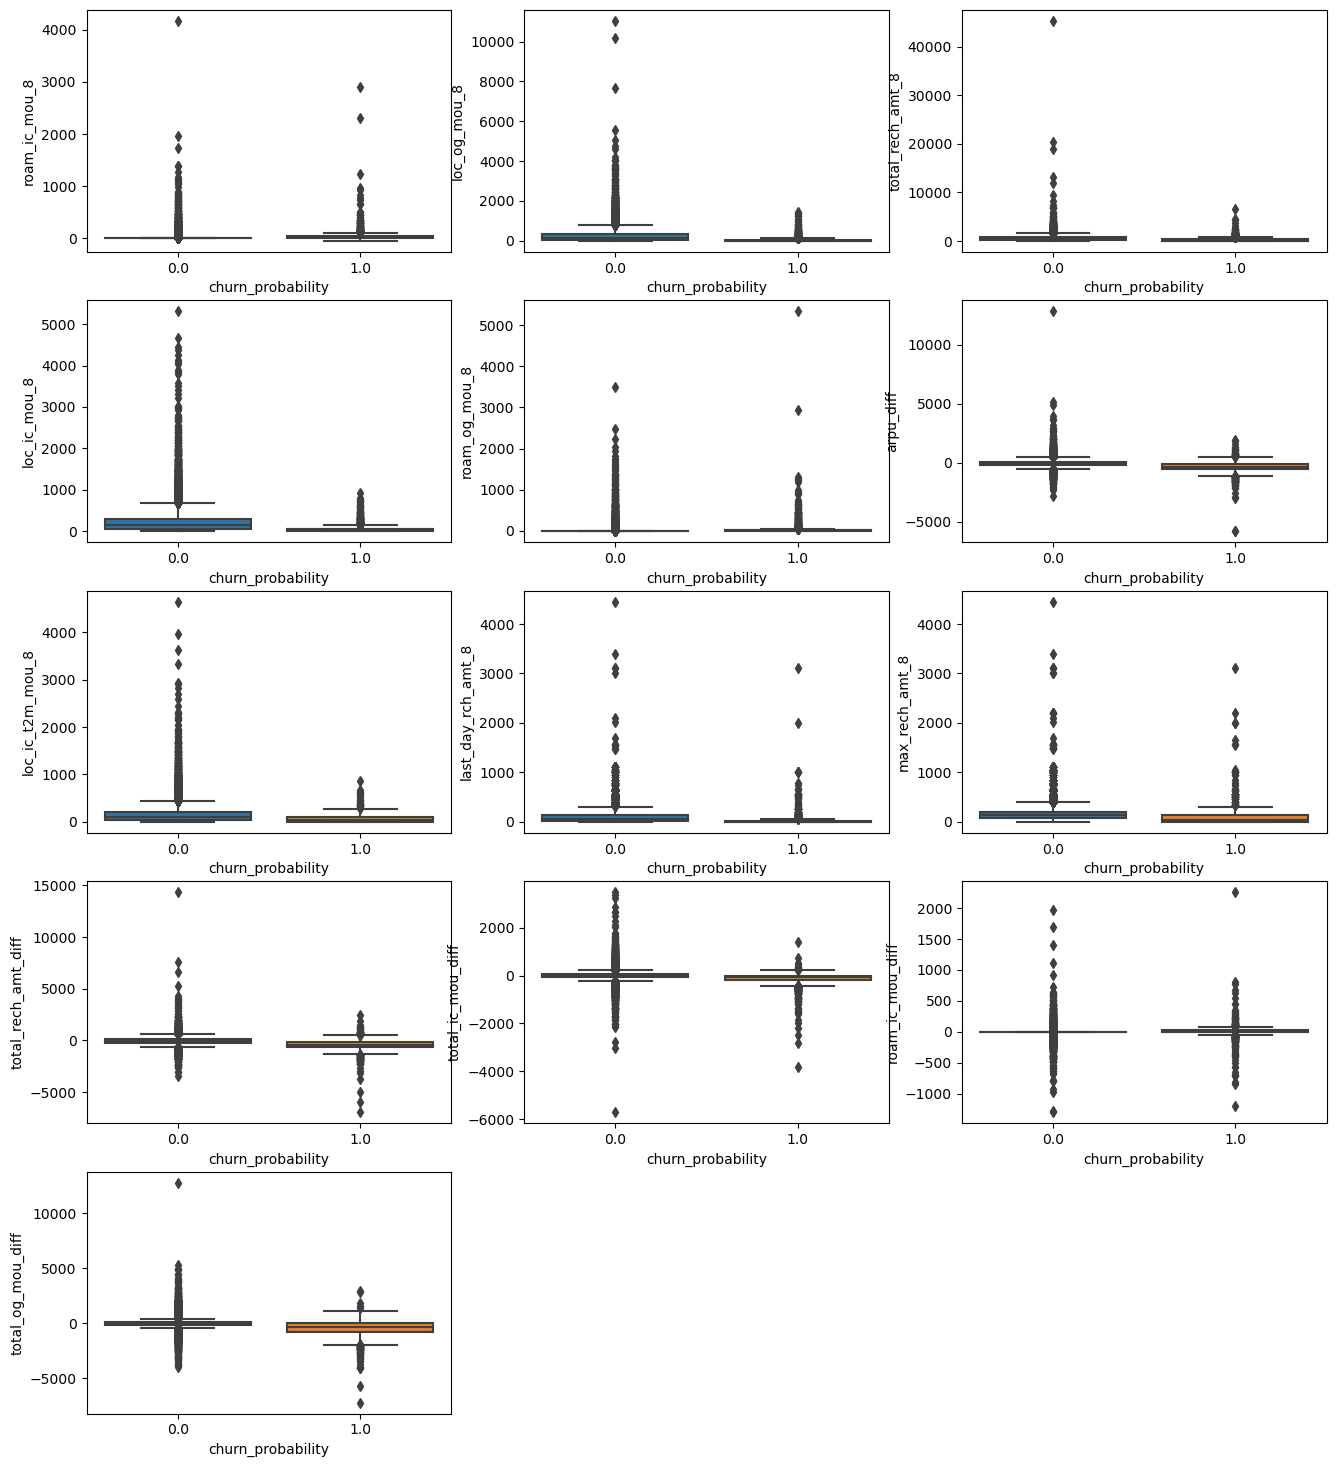

In [1070]:
# Let's plot some predictors w.r.t output variable churn_probability
plt.figure(figsize = (16, 22))
plt.subplot(6,3,1)
sns.boxplot(data=churn_filtered,y='roam_ic_mou_8',x='churn_probability')
plt.subplot(6,3,2)
sns.boxplot(data=churn_filtered,y='loc_og_mou_8',x='churn_probability')
plt.subplot(6,3,3)
sns.boxplot(data=churn_filtered,y='total_rech_amt_8',x='churn_probability')
plt.subplot(6,3,4)
sns.boxplot(data=churn_filtered,y='loc_ic_mou_8',x='churn_probability')
plt.subplot(6,3,5)
sns.boxplot(data=churn_filtered,y='roam_og_mou_8',x='churn_probability')
plt.subplot(6,3,6)
sns.boxplot(data=churn_filtered,y='arpu_diff',x='churn_probability')
plt.subplot(6,3,7)
sns.boxplot(data=churn_filtered,y='loc_ic_t2m_mou_8',x='churn_probability')
plt.subplot(6,3,8)
sns.boxplot(data=churn_filtered,y='last_day_rch_amt_8',x='churn_probability')
plt.subplot(6,3,9)
sns.boxplot(data=churn_filtered,y='max_rech_amt_8',x='churn_probability')
plt.subplot(6,3,10)
sns.boxplot(data=churn_filtered,y='total_rech_amt_diff',x='churn_probability')
plt.subplot(6,3,11)
sns.boxplot(data=churn_filtered,y='total_ic_mou_diff',x='churn_probability')
plt.subplot(6,3,12)
sns.boxplot(data=churn_filtered,y='roam_ic_mou_diff',x='churn_probability')
plt.subplot(6,3,13)
sns.boxplot(data=churn_filtered,y='total_og_mou_diff',x='churn_probability')
plt.show()

It is clear from above plots that there are outliers and it should be handled before model building

#### Correlation Analysis

<Figure size 2000x1000 with 0 Axes>

<Axes: >

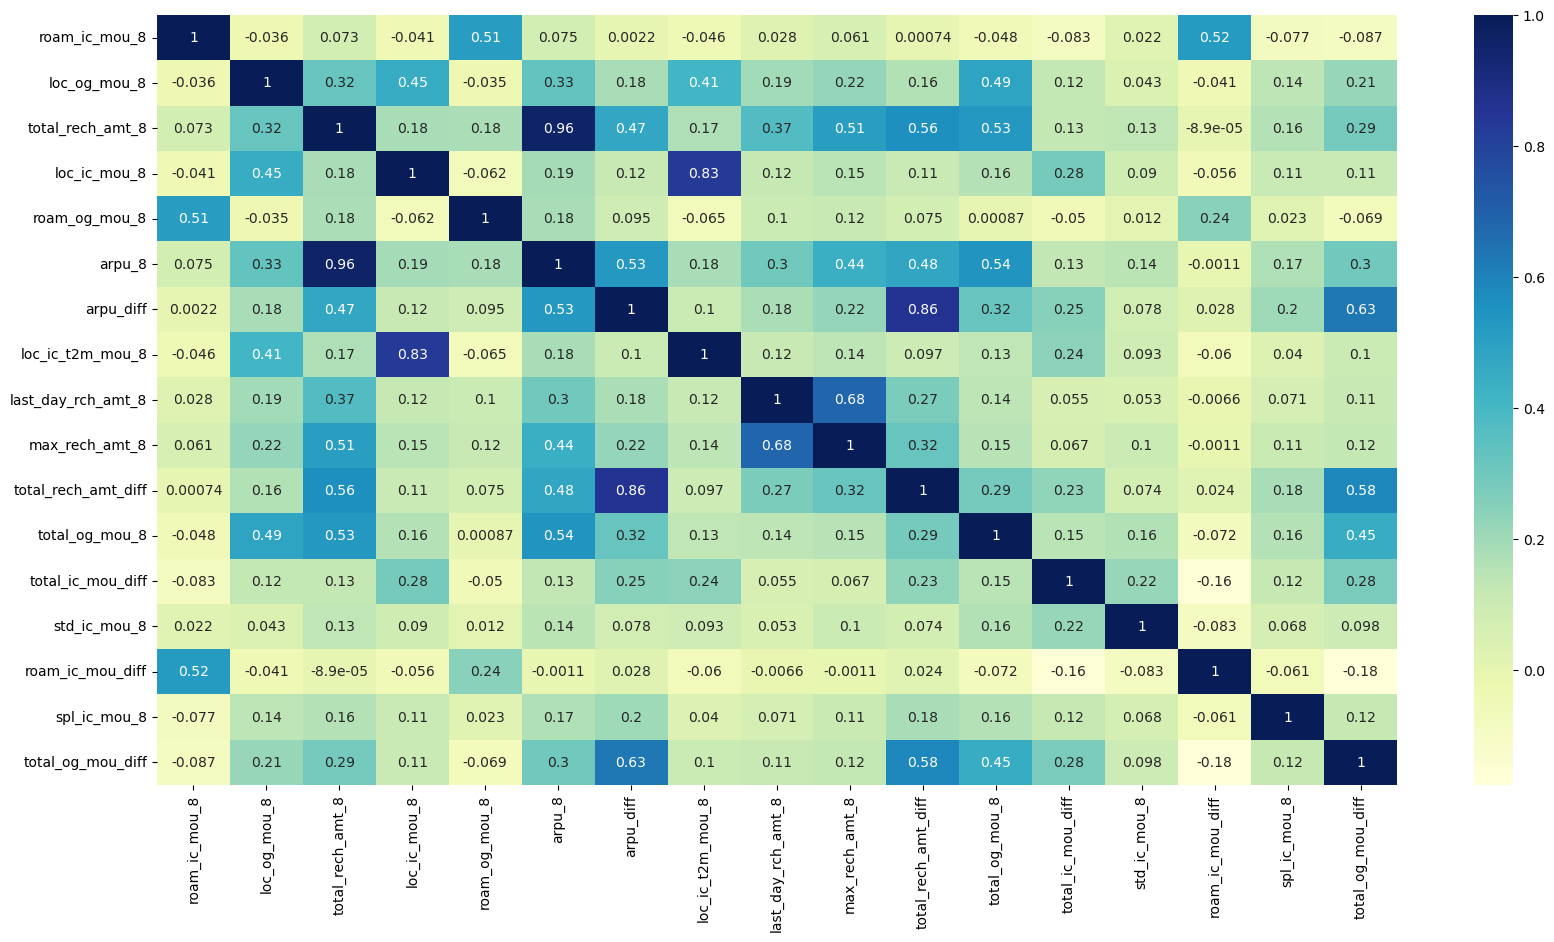

In [1071]:
var = ['roam_ic_mou_8', 'loc_og_mou_8', 'total_rech_amt_8', 'loc_ic_mou_8',
       'roam_og_mou_8', 'arpu_8', 'arpu_diff', 'loc_ic_t2m_mou_8',
       'last_day_rch_amt_8', 'max_rech_amt_8', 'total_rech_amt_diff',
       'total_og_mou_8', 'total_ic_mou_diff', 'std_ic_mou_8',
       'roam_ic_mou_diff', 'spl_ic_mou_8', 'total_og_mou_diff','churn_probability']
plt.figure(figsize = (20, 10))
sns.heatmap(churn_filtered[var].corr(), annot = True, cmap="YlGnBu")
plt.show()

### Outlier treatment

In [1072]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [1073]:
# Train - cap outliers in the numeric columns
churn_filtered[num_cols] = churn_filtered[num_cols].apply(cap_outliers, axis=0)

### Data preparation for Modeling

In [1074]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [1075]:
# change churn to numeric
churn_filtered['churn_probability'] = pd.to_numeric(churn_filtered['churn_probability'])

In [1076]:
# divide data into train and test
X = churn_filtered.drop("churn_probability", axis = 1)
y = churn_filtered["churn_probability"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [1077]:
# print shapes of train and test sets
print("X_train dimension:",X_train.shape)
print("y_train dimension:",y_train.shape)
print("X_test dimension:",X_test.shape)
print("y_test dimension:",y_test.shape)

X_train dimension: (15759, 163)
y_train dimension: (15759,)
X_test dimension: (5254, 163)
y_test dimension: (5254,)


In [1078]:
y_train.value_counts()

0.0    14455
1.0     1304
Name: churn_probability, dtype: int64

This shows that data set is imbalanced

In [1079]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in cat_cols if col not in ['churn_probability']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15759 entries, 13528 to 20561
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  15759 non-null  category
 1   night_pck_user_7  15759 non-null  category
 2   night_pck_user_8  15759 non-null  category
 3   fb_user_6         15759 non-null  category
 4   fb_user_7         15759 non-null  category
 5   fb_user_8         15759 non-null  category
dtypes: category(6)
memory usage: 216.2 KB


In [1080]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision  :', precision)
    true_positive_rate = round(TP/float(FN + TP),3)
    print('True positive rate : ', true_positive_rate)
    false_positive_rate = round(FP/float(TN + FP),3)
    print('False positive rate : ', false_positive_rate)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))
    

### Building Different Models (Logistic regression with PCA,Random Forest,XG Boost )


#### I) PCA + Logistic Regression

- PCA 

In [1081]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [1082]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [1083]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.48
1       20.92
2       26.89
3       31.95
4       36.01
5       39.66
6       42.40
7       45.04
8       47.48
9       49.81
10      51.86
11      53.78
12      55.63
13      57.38
14      59.07
15      60.74
16      62.21
17      63.61
18      64.94
19      66.26
20      67.55
21      68.72
22      69.87
23      70.93
24      71.94
25      72.92
26      73.89
27      74.83
28      75.72
29      76.57
30      77.38
31      78.19
32      78.99
33      79.77
34      80.52
35      81.26
36      81.93
37      82.59
38      83.22
39      83.84
40      84.43
41      84.97
42      85.49
43      86.00
44      86.49
45      86.96
46      87.42
47      87.85
48      88.26
49      88.65
50      89.03
51      89.39
52      89.75
53      90.10
54      90.43
55      90.76
56      91.08
57      91.39
58      91.69
59      91.98
60      92.28
61      92.56
62      92.84
63      93.12
64      93.38
65      93.63
66      93.87
67      94.09
68      94.31
69      94.52
70      94.73
71    

([<matplotlib.axis.XTick at 0x29136776260>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100'),
  Text(110, 0, '110'),
  Text(120, 0, '120'),
  Text(130, 0, '130'),
  Text(140, 0, '140'),
  Text(150, 0, '150'),
  Text(160, 0, '160'),
  Text(170, 0, '170'),
  Text(180, 0, '180'),
  Text(190, 0, '190'),
  Text(200, 0, '200'),
  Text(210, 0, '210'),
  Text(220, 0, '220'),
  Text(230, 0, '230'),
  Text(240, 0, '240')])

Text(0, 0.5, 'Cumulative variance')

Text(0.5, 1.0, 'Scree Plot of Telecom Churn Train Set')

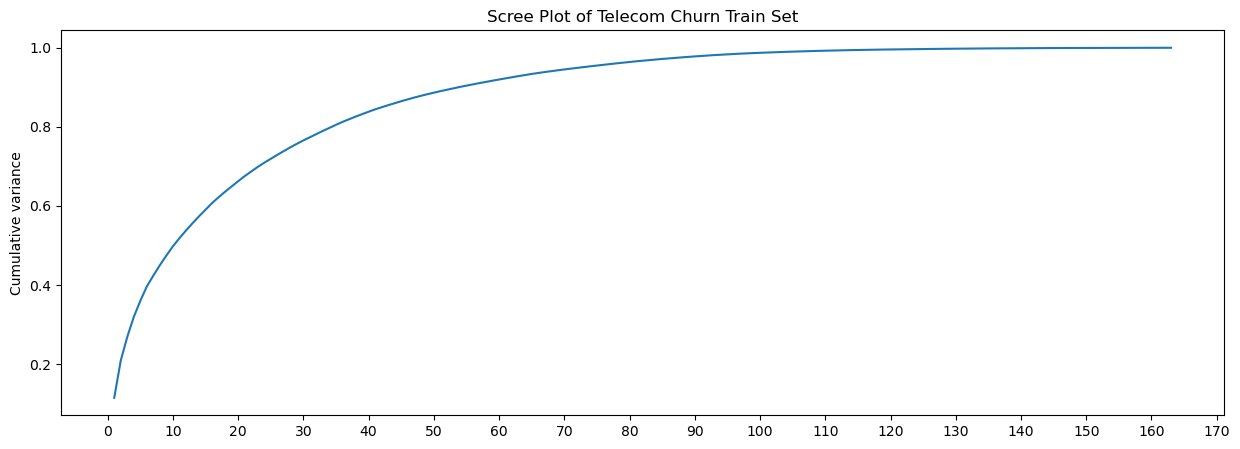

In [1084]:
#Scree plot
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[15,5])
plt.xticks(np.arange(0,250,10))
plt.plot(range(1,len(var_cumu)+1), var_cumu)
#plt.vlines(x=0.75, ymax=0.95, ymin=0, colors="r", linestyles="--")
#plt.hlines(y=0.95, xmax=75, xmin=0, colors="g", linestyles="--")
plt.ylabel("Cumulative variance")
plt.title('Scree Plot of Telecom Churn Train Set');
plt.show()

~ 80 components explain 90% variance

<BarContainer object of 163 artists>

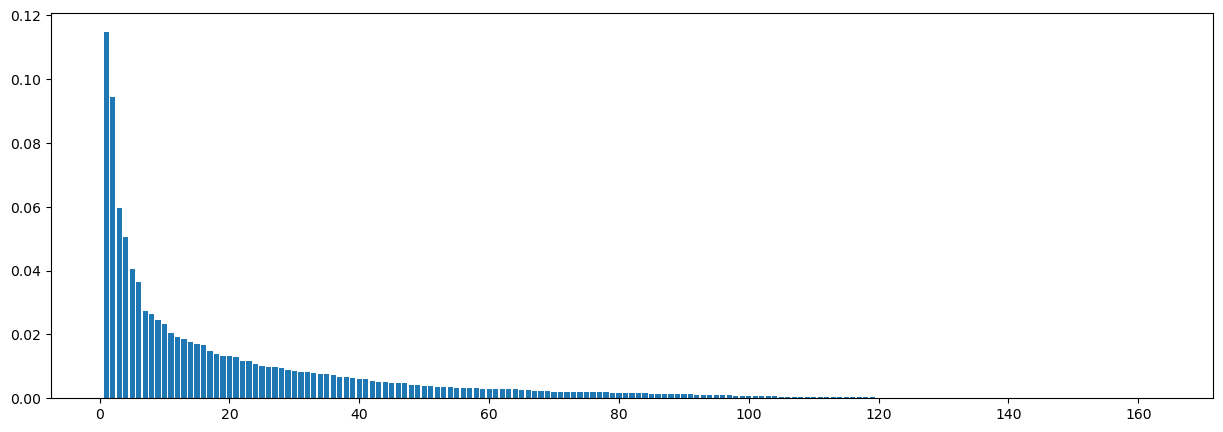

In [1085]:
# plot feature variance
fig = plt.figure(figsize=[15,5])
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.show()

- Logistic Regression with PCA

In [1086]:
# create pipeline
PCA_VARS = 80
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline_lr_pca = Pipeline(steps)

In [1088]:
# fit model
pipeline_lr_pca.fit(X_train, y_train)

# check score on train data
pipeline_lr_pca.score(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=80)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

0.8483406307506821

In [1089]:
#Let;s evaluate PCA result
y_pred = pipeline_lr_pca.predict(X_train)
y_pred_test = pipeline_lr_pca.predict(X_test)

train_matrix = confusion_matrix(y_train, y_pred)
test_matrix  = confusion_matrix(y_test,  y_pred_test)

print('Train Performance :\n')
model_metrics(train_matrix)

# check area under curve
y_pred_prob = pipeline_lr_pca.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob),2))

print('\nTest Performance :\n')
model_metrics(test_matrix)

# check area under curve
y_pred_prob_test = pipeline_lr_pca.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob_test),2))


Train Performance :

Accuracy : 0.848
Sensitivity / Recall : 0.837
Specificity :  0.849
Precision  : 0.334
True positive rate :  0.837
False positive rate :  0.151
F1-score : 0.477
AUC:    	 0.91

Test Performance :

Accuracy : 0.839
Sensitivity / Recall : 0.821
Specificity :  0.84
Precision  : 0.317
True positive rate :  0.821
False positive rate :  0.16
F1-score : 0.457
AUC:    	 0.9


- Hyperparameter tuning - Logistic Regression with PCA

In [1090]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline

steps = [("scaler", StandardScaler()), 
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_lr = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [1091]:
# fit model
model_lr.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=80)),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [1092]:
# cross validation results
pd.DataFrame(model_lr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.724705,0.967078,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
1,4.369631,0.758802,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
2,3.734452,0.793558,0.157953,0.064774,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.907693,0.901139,0.894801,0.904124,0.900885,0.901728,0.004251,13
3,4.034914,0.118137,0.117332,0.011868,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.910094,0.906540,0.896610,0.907924,0.902211,0.904676,0.004786,1
4,2.639161,0.114378,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
5,3.167834,0.123906,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
6,3.389792,0.063171,0.118633,0.023124,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.908352,0.902399,0.894422,0.906319,0.901165,0.902532,0.004814,9
7,4.293961,0.324067,0.130387,0.032699,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.909028,0.906199,0.896387,0.907610,0.901902,0.904225,0.004588,3
8,2.741669,0.286502,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,3.007613,0.145432,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17


In [1093]:
# print best hyperparameters
print("Best AUC: ", model_lr.best_score_)
print("Best hyperparameters: ", model_lr.best_params_)

Best AUC:  0.9046758382952756
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [1094]:
y_pred = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

train_matrix = confusion_matrix(y_train, y_pred)
test_matrix  = confusion_matrix(y_test,  y_pred_test)

print('Train Performance :\n')
model_metrics(train_matrix)

# check area under curve
y_pred_prob = model_lr.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob),2))

print('\nTest Performance :\n')
model_metrics(test_matrix)

# check area under curve

y_pred_prob_test = model_lr.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob_test),2))


Train Performance :

Accuracy : 0.872
Sensitivity / Recall : 0.805
Specificity :  0.878
Precision  : 0.374
True positive rate :  0.805
False positive rate :  0.122
F1-score : 0.511
AUC:    	 0.91

Test Performance :

Accuracy : 0.86
Sensitivity / Recall : 0.793
Specificity :  0.867
Precision  : 0.349
True positive rate :  0.793
False positive rate :  0.133
F1-score : 0.485
AUC:    	 0.9


#### II) Random Forest

In [1095]:
# random forest - the class weight is used to handle class imbalance
# it adjusts the cost function

forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1,verbose=1,random_state=42)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_rf = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)


In [1096]:
# fit model
model_rf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1, random_state=42,
                                              verbose=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [1097]:
# print best hyperparameters
print("Best AUC: ", model_rf.best_score_)
print("Best hyperparameters: ", model_rf.best_params_)

Best AUC:  0.9295588033352082
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [1098]:
# predict churn on test data
y_pred = model_rf.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model_rf.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


[[4753   66]
 [ 223  212]]
Sensitivity: 	0.49
Specificity: 	0.99
AUC:    	 0.93


In [1099]:
y_pred = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)

#train_matrix = confusion_matrix(y_train, y_pred)
train_matrix = confusion_matrix(y_train_resampled, y_pred)
test_matrix  = confusion_matrix(y_test,  y_pred_test)

print('Train Performance :\n')
model_metrics(train_matrix)
# check area under curve
y_pred_prob = model_rf.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob),2))

print('\nTest Performance :\n')
model_metrics(test_matrix)

# check area under curve
y_pred_prob_test = model_rf.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob_test),2))


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Train Performance :

Accuracy : 1.0
Sensitivity / Recall : 0.999
Specificity :  1.0
Precision  : 1.0
True positive rate :  0.999
False positive rate :  0.0
F1-score : 0.999
AUC:    	 1.0

Test Performance :

Accuracy : 0.945
Sensitivity / Recall : 0.487
Specificity :  0.986
Precision  : 0.763
True positive rate :  0.487
False positive rate :  0.014
F1-score : 0.595
AUC:    	 0.93


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


#### III) XGboost

In [1100]:
!pip install xgboost
import xgboost 

In [1101]:
# scale_pos_weight takes care of class imbalance
xgb = xgboost.XGBClassifier(random_state=42, scale_pos_weight= 0.9 ,
                                    tree_method='hist', 
                                   objective='binary:logistic',
                                   enable_categorical=True,                                                              
                                  )  
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [1102]:
print('Baseline Train AUC Score')
roc_auc_score(y_train, xgb.predict_proba(X_train)[:, 1])

Baseline Train AUC Score


1.0

In [1103]:
print('Baseline Test AUC Score')
roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

Baseline Test AUC Score


0.9299716400359689

In [1104]:
## Hyper parameter Tuning for xgboost 
parameters = {
              'learning_rate': [0.1, 0.2, 0.3],
              'gamma' : [10,20,30],
              'max_depth': [2,3,4],
              'min_child_weight': [10,20,30],
              'n_estimators': [150,200,500]}
xgb_search = GridSearchCV(estimator=xgb , param_grid=parameters,scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1)
xgb_search.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [10, 20, 30],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4],
                         'min_child_weight': [10, 20, 30],
                         'n_estimators': [150, 200, 500]},
             scoring='roc_auc', verbose=1)

In [1105]:
# Prediction on Train set
y_train_xgb_search = xgb_search.predict(X_train)
y_train_xgb_search[:5]

array([0, 0, 0, 0, 0])

In [1106]:
# Prediction on Test set
y_test_xgb_search = xgb_search.predict(X_test)
y_test_xgb_search[:5]

array([1, 0, 0, 0, 1])

In [1107]:
## XGBOOST [Hyper parameter tuned] Model Performance
print('Train AUC Score')
print(roc_auc_score(y_train_xgb_search, xgb_search.predict_proba(X_train)[:, 1]))
print('Test AUC Score')
print(roc_auc_score(y_test_xgb_search, xgb_search.predict_proba(X_test)[:, 1]))

Train AUC Score
1.0
Test AUC Score
1.0


In [1108]:
train_matrix = confusion_matrix(y_train, y_train_xgb_search)
test_matrix  = confusion_matrix(y_test,  y_test_xgb_search)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.951
Sensitivity / Recall : 0.548
Specificity :  0.988
Precision  : 0.801
True positive rate :  0.548
False positive rate :  0.012
F1-score : 0.651

Test Performance :

Accuracy : 0.946
Sensitivity / Recall : 0.52
Specificity :  0.984
Precision  : 0.751
True positive rate :  0.52
False positive rate :  0.016
F1-score : 0.615


So, Sensitivity/Recall is bettter in logistic regression compared to other models tried above. So, we will use logistic regression as final model. 

### Feature Selection

In [1109]:
# run a random forest model on train data
# number of variables to consider to split each node
max_features = int(round(np.sqrt(X_train.shape[1])))
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)


13


In [1110]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.0s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [1111]:
# OOB score
rf_model.oob_score_

0.9463798464369566

In [1112]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


[[4755   64]
 [ 238  197]]
Sensitivity: 	0.45
Specificity: 	0.99


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


ROC:    	 0.93


In [1113]:
churn_filtered.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,4.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.160000,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13.0,10.0,8.0,290.0,136.0,122.0,50.0,41.0,30.0,25.0,10.0,30.0,7.0,7.0,6.0,25.0,41.0,25.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,647.0,0.0,0.00,0.00,0.0,-82.8845,-6.925,-37.920,-26.82,-7.865,-26.665,-2.175,0.0,-8.500,-37.340,12.860,0.000,0.0,0.000,12.860,-3.5,-91.0,-15.5,-1.0,-8.0,-41.0,-136.375,0.00
1,15.0,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.430000,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,5.0,3.0,4.0,654.0,400.0,652.0,250.0,250.0,250.0,0.0,150.0,250.0,1.0,0.0,1.0,154.0,0.0,154.0,154.0,0.0,154.0,260.42,0.00,354.35,0.0,0.00,0.00,0.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,602.0

#### Feature Importance

In [1114]:
# predictors
features = churn_filtered.drop('churn_probability', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

importance

array([0.00477368, 0.00456943, 0.00536924, 0.02836512, 0.00403685,
       0.00442293, 0.00790258, 0.0038626 , 0.00431769, 0.00765693,
       0.0022842 , 0.00336881, 0.0444502 , 0.00278111, 0.00316548,
       0.03176595, 0.00318548, 0.0043821 , 0.00708207, 0.00372034,
       0.00480866, 0.01030106, 0.00219572, 0.00256447, 0.00332139,
       0.00272212, 0.00167385, 0.00299366, 0.00397916, 0.00596159,
       0.03940991, 0.00318901, 0.00319761, 0.00298594, 0.00304915,
       0.00299641, 0.00311711, 0.00130683, 0.00128086, 0.00088357,
       0.00449364, 0.00419482, 0.00398648, 0.0018829 , 0.00151399,
       0.00848667, 0.00231363, 0.00241126, 0.00299641, 0.00191342,
       0.00038499, 0.00663683, 0.00362576, 0.00435776, 0.01951032,
       0.00396166, 0.00521764, 0.01046003, 0.00368585, 0.00389535,
       0.02421628, 0.00328154, 0.00257699, 0.00359765, 0.00490545,
       0.00442266, 0.03550624, 0.00266678, 0.00274364, 0.00249987,
       0.00322482, 0.00371796, 0.00489493, 0.00114036, 0.00118

In [1115]:
# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,4.796425
1,roam_ic_mou_8,4.445020
2,loc_og_mou_8,3.940991
3,total_rech_amt_8,3.821964
4,loc_ic_mou_8,3.550624
5,roam_og_mou_8,3.176595
6,arpu_8,2.836512
7,arpu_diff,2.698735
8,loc_ic_t2m_mou_8,2.421628
9,last_day_rch_amt_8,2.402798


In [1116]:
# extract top 30 features
top_n = 30

top_features = feature_importance.variables[0:top_n]

<Axes: >

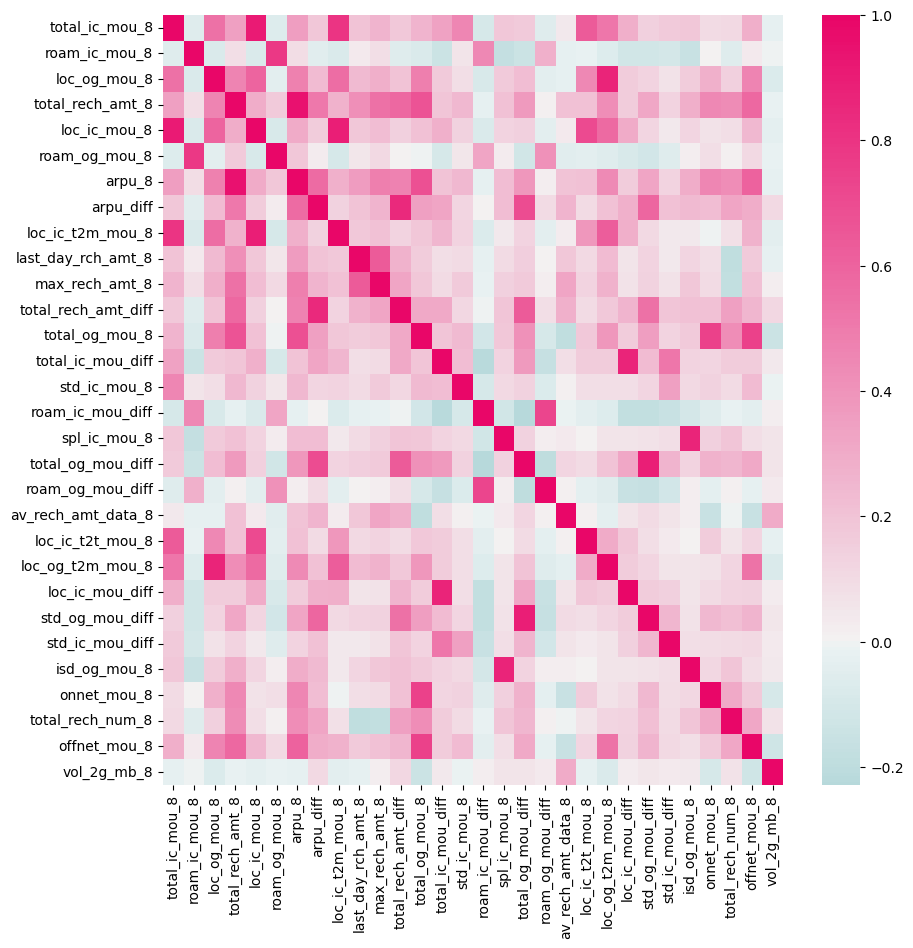

In [1117]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [1118]:
feature_importance

,variables,importance_percentage
0,total_ic_mou_8,4.796425
1,roam_ic_mou_8,4.445020
2,loc_og_mou_8,3.940991
3,total_rech_amt_8,3.821964
4,loc_ic_mou_8,3.550624
5,roam_og_mou_8,3.176595
6,arpu_8,2.836512
7,arpu_diff,2.698735
8,loc_ic_t2m_mou_8,2.421628
9,last_day_rch_amt_8,2.402798


In [1119]:
# Collect top features based on above data
top_features = ["roam_ic_mou_8","loc_og_mou_8","total_rech_amt_8","loc_ic_mou_8","roam_og_mou_8","arpu_8","arpu_diff","loc_ic_t2m_mou_8",
"last_day_rch_amt_8","max_rech_amt_8","total_rech_amt_diff","total_og_mou_8","total_ic_mou_diff","std_ic_mou_8","roam_ic_mou_diff","spl_ic_mou_8","total_og_mou_diff"]

# Create new test and train set based on top features only 
X_train_new = X_train[top_features]
X_test_new  = X_test[top_features]

### Final Model Building 

In [1120]:
# Building final model using logistic regression  
# as sensitivity/recall is the best in logistic regression
# The model will be built based on the data set having top features selected above 

steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [1121]:
# fit model
model.fit(X_train_new, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [1122]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.894095990656899
Best hyperparameters:  {'logistic__C': 1, 'logistic__penalty': 'l2'}


In [1123]:
# predict churn on test data
y_pred = model.predict(X_test_new)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test_new)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4294  525]
 [ 113  322]]
Sensitivity: 	0.74
Specificity: 	0.89
ROC:    	 0.89


#### Extract the intercept and the coefficients from the logistic model 

In [1124]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [1125]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [1126]:
# coefficients
coefficients = logistic_model.coef_.reshape((17, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train_new.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [1127]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,roam_ic_mou_8,loc_og_mou_8,total_rech_amt_8,loc_ic_mou_8,roam_og_mou_8,arpu_8,arpu_diff,loc_ic_t2m_mou_8,last_day_rch_amt_8,max_rech_amt_8,total_rech_amt_diff,total_og_mou_8,total_ic_mou_diff,std_ic_mou_8,roam_ic_mou_diff,spl_ic_mou_8,total_og_mou_diff
0,-1.483785,0.083195,-0.297672,-0.072187,-0.691225,0.317866,-0.011007,-0.077566,-0.320551,-0.321991,0.069461,-0.457998,0.226276,-0.444858,-0.220281,-0.171504,-0.609087,-0.202815


In [1128]:
coefficients_df.columns

Index(['roam_ic_mou_8', 'loc_og_mou_8', 'total_rech_amt_8', 'loc_ic_mou_8',
       'roam_og_mou_8', 'arpu_8', 'arpu_diff', 'loc_ic_t2m_mou_8',
       'last_day_rch_amt_8', 'max_rech_amt_8', 'total_rech_amt_diff',
       'total_og_mou_8', 'total_ic_mou_diff', 'std_ic_mou_8',
       'roam_ic_mou_diff', 'spl_ic_mou_8', 'total_og_mou_diff'],
      dtype='object')

In [1129]:
X_train_new.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15759 entries, 13528 to 20561
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   roam_ic_mou_8        15759 non-null  float64
 1   loc_og_mou_8         15759 non-null  float64
 2   total_rech_amt_8     15759 non-null  float64
 3   loc_ic_mou_8         15759 non-null  float64
 4   roam_og_mou_8        15759 non-null  float64
 5   arpu_8               15759 non-null  float64
 6   arpu_diff            15759 non-null  float64
 7   loc_ic_t2m_mou_8     15759 non-null  float64
 8   last_day_rch_amt_8   15759 non-null  float64
 9   max_rech_amt_8       15759 non-null  float64
 10  total_rech_amt_diff  15759 non-null  float64
 11  total_og_mou_8       15759 non-null  float64
 12  total_ic_mou_diff    15759 non-null  float64
 13  std_ic_mou_8         15759 non-null  float64
 14  roam_ic_mou_diff     15759 non-null  float64
 15  spl_ic_mou_8         15759 non-n

### Creation of Kaggle submission file 

In [1130]:
churn_filtered.shape

(21013, 164)

In [1131]:
churn_test.shape

(30000, 163)

In [1132]:
# train column not present in test data
train_col = churn_filtered.columns
test_col  = churn_test.columns
diff = []
for i in train_col:
    if i not in test_col:
        diff.append(i)
diff

['churn_probability']

In [1133]:
#test columns not present in train
train_col = churn_filtered.columns
test_col  = churn_test.columns
diff = []
for i in test_col:
    if i not in train_col:
        diff.append(i)
diff

[]

In [1134]:
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'churn_probability']

In [1135]:
# Remove churn_probability from category list
cat_cols_new =  set(cat_cols) - {'churn_probability'}


In [1136]:
#top_features = coefficients_df.columns
submission_data = churn_test[top_features]
submission_data.shape


(30000, 17)

In [1137]:
# Prediction based on final model and test data set
churn_test['churn_probability'] = model.predict(submission_data)
churn_test['churn_probability'] = churn_test['churn_probability'].astype(int)
churn_test['id'] = churn_test['id'].astype(int)
output = churn_test[['id','churn_probability']]
output.head()


,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [1138]:
# Dump file for Kaggle submission
output.to_csv('submission_telecom_churn_case_study_Aloke_Kumar_Mukherjee_C54.csv',index=False)

### Summary /  Business Insights

The customers who satisfies one or more criteria mentioned below, have higher probability of churn:
* have done lower amount of recharge compared to previous months
* have used more roaming outgoing compared to previous month
* have lower amount local incoming and outgoing usage 
* have done late recharge compared to previous months 
* have lower incoming call (of any type) usage

Telecom company needs to pay attention to the factors mentioned above and should come up with better offer for customers